In [1]:
import numpy as np
from scipy.fft import fft2, fftshift, ifft2, ifftshift
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image

In [2]:
image_original: np.ndarray = plt.imread(
    Path().absolute().parent
    .joinpath('data').joinpath('lab6').joinpath("image2.png")
)

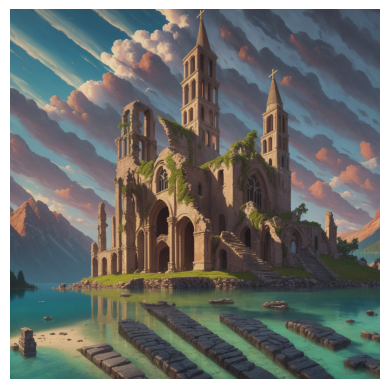

In [3]:
def show_image(img, title=None):
    plt.axis('off')
    if title is not None: plt.title(title)
    plt.imshow(img)
    plt.show()
    
def save_image(img, name):
    result = Image.fromarray(img.astype(np.uint8))
    result.save(Path().absolute().parent.joinpath("result").joinpath(name))

show_image(image_original)

(1024, 1024, 3)
2.792552425735727e-05 7.3862094299045795
3.780765292721741e-06 1.0
0.0 1.0


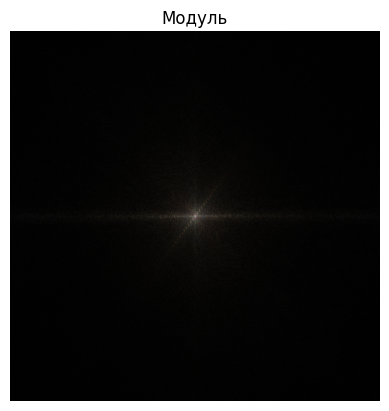

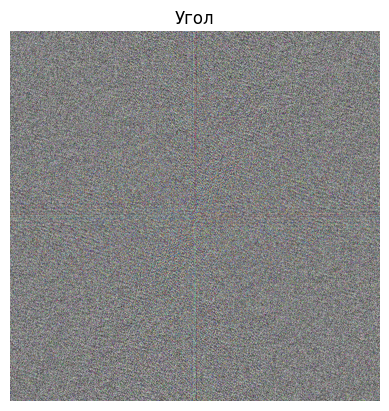

In [4]:
image = image_original / 255
print(image.shape)

image_f = np.zeros_like(image, dtype=complex)
for i in range(3): image_f[:, :, i] = fftshift(fft2(image[:, :, i]))

image_f_abs = np.log(1 + np.abs(image_f))
image_f_max_val = image_f_abs.max()
print(image_f_abs.min(), image_f_abs.max())

image_f_abs /= image_f_max_val
print(image_f_abs.min(), image_f_abs.max())
save_image(image_f_abs*255, "abs_modified.png")

image_f_arg = np.angle(image_f)
image_f_arg_norm = (image_f_arg - image_f_arg.min()) / (image_f_arg.max() - image_f_arg.min())
print(image_f_arg_norm.min(), image_f_arg_norm.max())

show_image(image_f_abs, "Модуль")
show_image(image_f_arg_norm, "Угол")

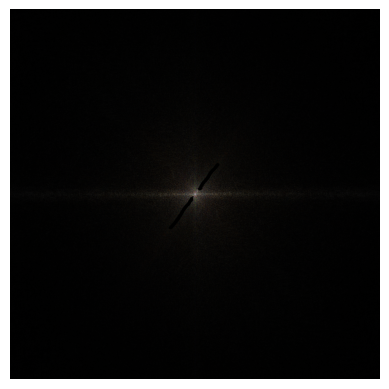

In [5]:
modification_tag = "2"

abs_f_modified: np.ndarray = plt.imread(
    Path().absolute().parent
    .joinpath('data').joinpath('lab6').joinpath(f"abs_modified_{modification_tag}.png")
)[:, :, :3]
show_image(abs_f_modified)

0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1612.5781249999986].


0.0 1612.5781249999986


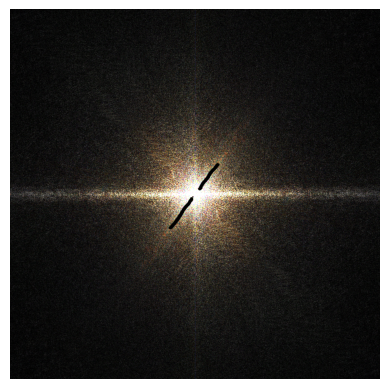

-3.141592653589793 3.141592516454973


In [6]:
print(abs_f_modified.min(), abs_f_modified.max())
abs_f_modified_l = np.e ** (abs_f_modified * image_f_max_val) - 1
print(abs_f_modified_l.min(), abs_f_modified_l.max())
show_image(abs_f_modified_l)
print(image_f_arg.min(), image_f_arg.max())
f_restored = abs_f_modified_l * np.exp(1j * image_f_arg)

In [7]:
restored = np.zeros_like(f_restored, dtype=complex)

for i in range(3): restored[:, :, i] = ifft2(ifftshift(f_restored[:, :, i]))

(-7.707117713151709e-05-8.98845216823775e-05j) (0.004209242558500605+0.0001996615815695809j)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.01965315016853686..1.0733568524176544].


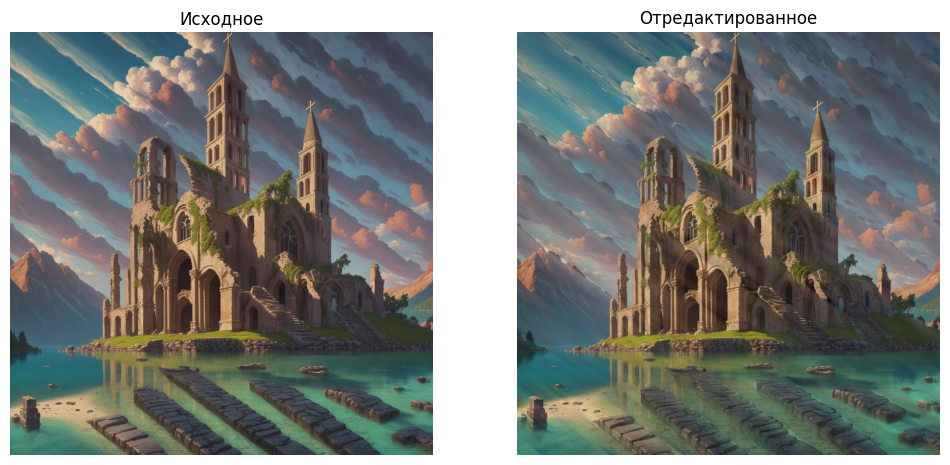

C:\Users\kisik\AppData\Local\Temp\ipykernel_372\1128560557.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  result = Image.fromarray(img.astype(np.uint8))


In [8]:
print(restored.min(), restored.max())

plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Исходное")
plt.imshow(image_original)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Отредактированное")
plt.imshow(restored.real * 255)

plt.show()

save_image(f_restored, f"restored_{modification_tag}.png")